In [1]:
import fastai

In [2]:
from fastai.vision import *

In [3]:


path = '/opt/AIStorage/PLAYGROUND/data/'



data = ImageDataBunch.from_folder(path,valid='validation', size=512, bs=16, ds_tfms=(rand_pad(2, 512), []))


epochs=8
arch = models.densenet121

    
    

In [4]:
#learn = cnn_learner(data, arch, metrics=accuracy).to_fp16()
learn = cnn_learner(data, arch, metrics=accuracy, bn_final=True)
#learn = cnn_learner(data, arch, metrics=accuracy, opt_func=optim.SGD)

In [5]:
#learn.lr_find()
#learn.recorder.plot()

In [6]:
learn.model = nn.DataParallel(learn.model)
learn.fit_one_cycle(epochs)

epoch,train_loss,valid_loss,accuracy,time
0,0.648572,0.571357,0.714286,02:25
1,0.561922,0.540288,0.743108,02:20
2,0.505521,0.491797,0.774436,02:20
3,0.465719,0.469136,0.788221,02:19
4,0.394308,0.456198,0.796992,02:20
5,0.391350,0.441827,0.809524,02:20
6,0.309225,0.429346,0.807018,02:19
7,0.324240,0.428401,0.809524,02:22


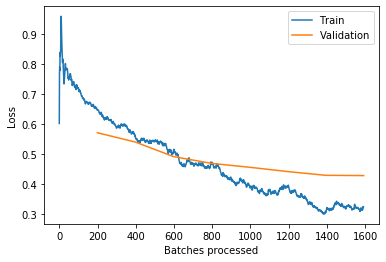

In [7]:
learn.recorder.plot_losses()

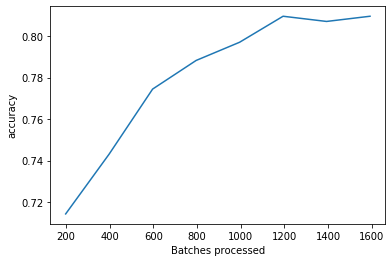

In [8]:
learn.recorder.plot_metrics()

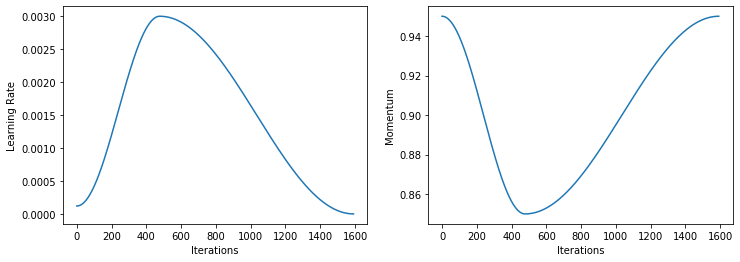

In [9]:
learn.recorder.plot_lr(show_moms=True)

In [10]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (3196 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
positive,positive,positive,positive,positive
Path: /opt/AIStorage/PLAYGROUND/data;

Valid: LabelList (798 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
positive,positive,positive,positive,positive
Path: /opt/AIStorage/PLAYGROUND/data;

Test: None, model=DataParallel(
  (module): Sequential(
    (0): Sequential(
      (0): Sequential(
        (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu0): ReLU(inplace=True)
        (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (denseblock1): _DenseBlock(
          (denselayer1): _Dens